# Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

## Tasks
1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best  𝑅2  score.
3. Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [13]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [14]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [15]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [16]:
df.shape

(52, 6)

In [22]:
df.drop_duplicates()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [23]:
df.shape

(52, 6)

In [27]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


## IQR to detect the outliers 

In [107]:
def outlier_presence(df):
    for i in df.keys():
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        print("Interquartile Range of " + i + " is", IQR)
        print("Lower_thershold ", lower_limit)
        print("Upper_thershold ", upper_limit)
        outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
        if outliers.shape[0] != 0:
            print("Outlier is Presented In",i )
            print("\n")
        else:
            print("Outlier is Not Presented In",i )
            print("\n")
  
outlier_presence(df)

Interquartile Range of Sex is 1.0
Lower_thershold  -1.5
Upper_thershold  2.5
Outlier is Not Presented In Sex


Interquartile Range of Rank is 2.0
Lower_thershold  -2.0
Upper_thershold  6.0
Outlier is Not Presented In Rank


Interquartile Range of Year is 8.0
Lower_thershold  -9.0
Upper_thershold  23.0
Outlier is Presented In Year


Interquartile Range of Degree is 1.0
Lower_thershold  -1.5
Upper_thershold  2.5
Outlier is Not Presented In Degree


Interquartile Range of YSdeg is 16.5
Lower_thershold  -18.0
Upper_thershold  48.0
Outlier is Not Presented In YSdeg


Interquartile Range of Salary is 9011.75
Lower_thershold  4729.125
Upper_thershold  40776.125
Outlier is Not Presented In Salary




In [29]:
def Outlier_Data_Points(df):
    for i in df.keys():
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
        if outliers.empty:
            print("No Outlier is Presented In",i )
        else:
            print("Outlier is Presented In " + i + "is")
            for j in outliers[i]:
                print(j)
            print("\n")
Outlier_Data_Points(df)

No Outlier is Presented In Sex
No Outlier is Presented In Rank
Outlier is Presented In Yearis
25


No Outlier is Presented In Degree
No Outlier is Presented In YSdeg
No Outlier is Presented In Salary


# At the third column 'year' there is an 1 outlier 25 which doesn't make an impact.

# Finding the relationship between features and the target

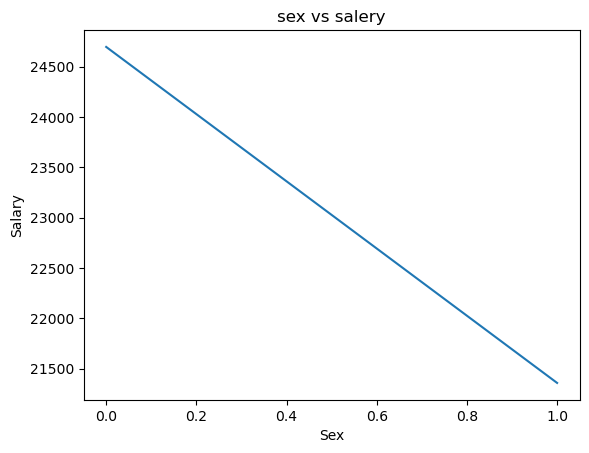

In [32]:
df.groupby("Sex")["Salary"].mean().plot()
plt.title("sex vs salery")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

In [33]:
df[["Sex","Salary"]].corr()                              #correlation

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


## the sex_vs_Salary  corr which is having -0.2

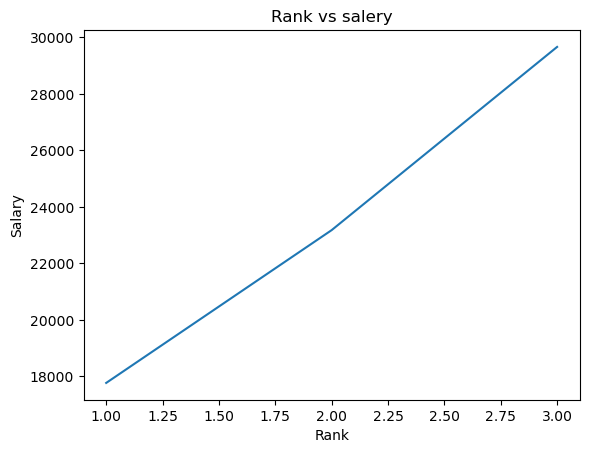

In [34]:
df.groupby("Rank")["Salary"].mean().plot()
plt.title("Rank vs salery")
plt.xlabel("Rank")
plt.ylabel("Salary")
plt.show()

In [35]:
df[["Rank","Salary"]].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


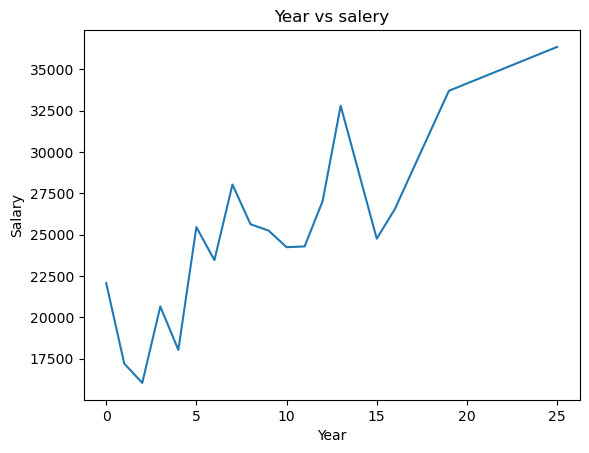

In [36]:
df.groupby("Year")["Salary"].mean().plot()
plt.title("Year vs salery")
plt.xlabel("Year")
plt.ylabel("Salary")
plt.show()

In [37]:
df[["Year","Salary"]].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


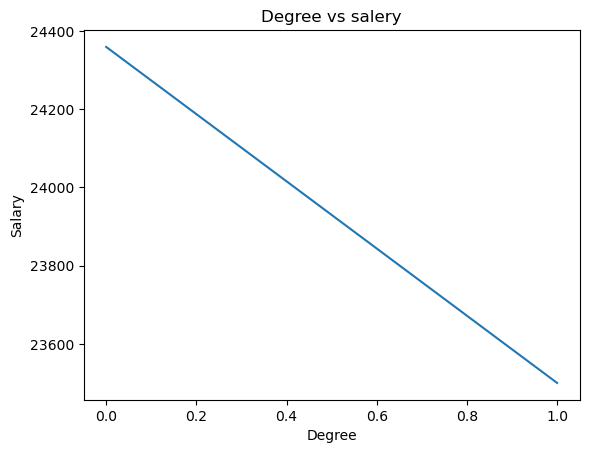

In [38]:
df.groupby("Degree")["Salary"].mean().plot()
plt.title("Degree vs salery")
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.show()

In [39]:
df[["Degree","Salary"]].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


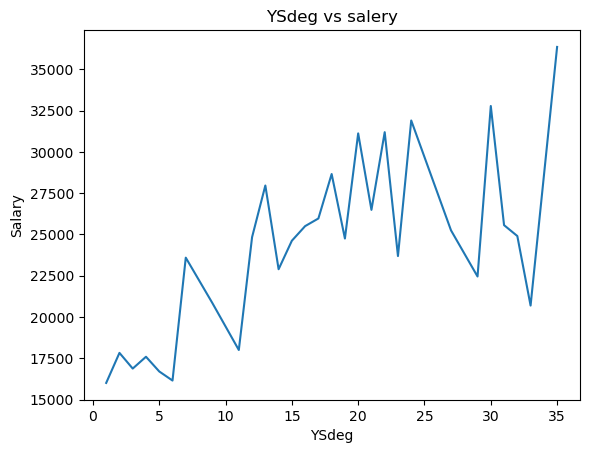

In [40]:
df.groupby("YSdeg")["Salary"].mean().plot()
plt.title("YSdeg vs salery")
plt.xlabel("YSdeg")
plt.ylabel("Salary")
plt.show()

In [41]:
df[["YSdeg","Salary"]].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


# 1.Find the linear regression equation for this data using columns 1-5 to column 6.

In [97]:
from sklearn.model_selection import train_test_split        

X = df.loc[:,["Sex", "Rank", "Year", "Degree", "YSdeg"]].values
y = df.loc[:,"Salary"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 12)


### Scaling the train

In [98]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled_data = scaler.transform(X_train) 
X_test_scaled_data = scaler.transform(X_test)

In [99]:
from sklearn.linear_model import LinearRegression          #importing all the required functions
regressor = LinearRegression() 

regressor.fit(X_train_scaled_data, y_train) 

LinearRegression()

In [100]:
y_predic = regressor.predict(X_test_scaled_data)                  # given the features of the test dataset, it will give the final predictions
y_predic

array([17256.5369674 , 16152.97015338, 23035.78279047, 31891.9215675 ,
       24046.98479269, 25733.23830539, 22710.69903296, 19840.50266756,
       17792.75790962, 17176.84253235, 18479.39125447, 22676.90365325,
       17743.68004512, 28127.88016855, 33228.78076947, 30543.48053116])

In [101]:
New_data = pd.DataFrame({'Actual': y_test,'predicted':y_predic})
New_data

,Actual,predicted
0,17600,17256.536967
1,16244,16152.970153
2,20525,23035.782790
3,31909,31891.921568
4,24832,24046.984793
5,24742,25733.238305
6,26182,22710.699033
7,18304,19840.502668
8,16150,17792.757910
9,16700,17176.842532


In [105]:
df_coff =pd.DataFrame(regressor.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"],columns = ["coefficient"])
df_coff

,coefficient
Sex,688.797588
Rank,4436.709829
Year,2475.768192
Degree,-437.860023
YSdeg,-760.416929


### coefficient for the rank has high

In [106]:
from sklearn import metrics                              # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.4070384910887277


# 2.Find the selection of columns with the best  𝑅2  score.

In [115]:
def Selc_Col(df):
    for i in df.keys():
        if i != 'Salary':
            X = df.loc[:, [i]].values 
            y = df.loc[:, 'Salary'].values 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
            scaler = StandardScaler() 
            scaler.fit(X_train,y_train) 
            X_train_scaled = scaler.transform(X_train) 
            X_test_scaled = scaler.transform(X_test) 
            regressor = LinearRegression()   
            regressor.fit(X_train_scaled, y_train)
            y_pred = regressor.predict(X_test_scaled) 
            print('R2 - SCORE of ' + i + ' is: ', metrics.r2_score(y_test,y_pred))
N=Selc_Col(df)
N

R2- SCORE of Sex is:  -0.012233465811496869
R2- SCORE of Rank is:  0.6723218219021224
R2- SCORE of Year is:  0.39359646731694975
R2- SCORE of Degree is:  -0.05577210942642963
R2- SCORE of YSdeg is:  0.3561736731232156


# R2- SCORE of the feature of Rank which having the high value score which make the best R2-Score

# 3.Report whether sex is a factor in salary.

## Answer : No it's not a Factor the Salary Prediction.Here the coefficient and R2- Score having the Low Value.